## casualVotes.csv

In [36]:
import pandas as pd

df_casual_votes = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\casualVotes.csv')

print("Shape:", df_casual_votes.shape)
print("\nColumns:", df_casual_votes.columns.tolist())
print("\nFirst few rows:")
print(df_casual_votes.head())
print("\nData types:")
print(df_casual_votes.dtypes)
print("\nMissing values:")
print(df_casual_votes.isnull().sum())

Shape: (21590, 7)

Columns: ['UUID', 'videoID', 'hashedVideoID', 'category', 'upvotes', 'timeSubmitted', 'titleID']

First few rows:
                                   UUID      videoID  \
0  c1eb8b1d-2db8-4fd9-9b95-6967d3d8b884  xuCn8ux2gbs   
1  45e8fddf-2590-4e13-a642-47d70da2536a  xuCn8ux2gbs   
2  fca76bc8-6a83-4102-8df0-f5bbb016a387  4RnTwS878fQ   
3  e9383d32-9004-4a91-ad2a-572bb0148f78  7fO8r-SYPNU   
4  70e24b27-11f9-4f98-9d25-e89a9be52e8d  p_S6NIEfu-U   

                                       hashedVideoID     category  upvotes  \
0  66dc3939008ac21a3174cef4d3c50bf246b6dc566ccb7f...        funny       34   
1  66dc3939008ac21a3174cef4d3c50bf246b6dc566ccb7f...     downvote        0   
2  ba2e3c05d9d72ef881c6f342ae9d05b83d88b477fe22a1...  descriptive        1   
3  d7586c7107696b317b8aeadde7dbb4553a5b86c2686903...     downvote        1   
4  423fbf960d082191483ed0e9febbedc20bfedfa952bd3c...  descriptive        1   

   timeSubmitted  titleID  
0  1739359550434        0  
1  17

In [37]:
# Category distribution
print("Category distribution:")
print(df_casual_votes['category'].value_counts())
print("\nCategory percentages:")
print(df_casual_votes['category'].value_counts(normalize=True) * 100)

Category distribution:
category
descriptive    7677
downvote       4499
funny          3999
creative       2070
clever         1701
other          1644
Name: count, dtype: int64

Category percentages:
category
descriptive    35.558129
downvote       20.838351
funny          18.522464
creative        9.587772
clever          7.878648
other           7.614636
Name: proportion, dtype: float64


In [38]:
# Upvotes analysis
print("Upvotes statistics:")
print(df_casual_votes['upvotes'].describe())
print("\nUpvotes distribution by category:")
print(df_casual_votes.groupby('category')['upvotes'].mean().sort_values(ascending=False))

Upvotes statistics:
count    21590.000000
mean         1.130014
std          0.653649
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         34.000000
Name: upvotes, dtype: float64

Upvotes distribution by category:
category
funny          1.223556
descriptive    1.131822
creative       1.126570
clever         1.120517
downvote       1.072461
other          1.065693
Name: upvotes, dtype: float64


## casualVoteTitles.csv

In [39]:
import pandas as pd

df_casual_vote_titles = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\casualVoteTitles.csv')

print("Shape:", df_casual_vote_titles.shape)
print("\nColumns:", df_casual_vote_titles.columns.tolist())
print("\nFirst few rows:")
print(df_casual_vote_titles.head())
print("\nData types:")
print(df_casual_vote_titles.dtypes)
print("\nMissing values:")
print(df_casual_vote_titles.isnull().sum())

Shape: (12571, 4)

Columns: ['videoID', 'id', 'hashedVideoID', 'title']

First few rows:
       videoID  id                                      hashedVideoID  \
0  VJFaO2-zsCU   0  808650e6277650d067210ae89b585f8856f0c8e28009a1...   
1  kXBV4YBXGG8   0  db1fb5077f7c6f9dce145cbe0e49618ac7e04af2d01052...   
2  ygltm9OcWzU   0  f4e22655529cde4f39fd734066fef08f0cb074ad22a3ef...   
3  EpAr_PRifLs   0  0e184e6ba8f27f7879d21e0e03002b7ce930c0f816c5a5...   
4  3qt9H2rkwxo   0  1198e8fdc755f56b9d5651722300eb2778284d5fcdf12b...   

                                               title  
0  every type of computer virus explained in 8 mi...  
1          🏳️‍⚧️🔞 i found a cute bottom in vrchat :3  
2            revealing my entire military collection  
3                   what the hell is shrek 5 doing??  
4                     a video essay about efficiency  

Data types:
videoID          object
id                int64
hashedVideoID    object
title            object
dtype: object

Missing values:
vi

In [40]:
# Text length analysis
df_casual_vote_titles['title_length'] = df_casual_vote_titles['title'].fillna('').str.len()
print("Title length statistics:")
print(df_casual_vote_titles['title_length'].describe())
print("\nTitle length by id:")
print(df_casual_vote_titles.groupby('id')['title_length'].mean())

Title length statistics:
count    12571.000000
mean        44.915599
std         19.029211
min          1.000000
25%         32.000000
50%         43.000000
75%         56.000000
max        211.000000
Name: title_length, dtype: float64

Title length by id:
id
0     44.966280
1     43.089286
2     34.750000
3     33.000000
4     31.000000
5     31.000000
6     31.000000
7     31.000000
8     31.000000
9     31.000000
10    31.000000
11    31.000000
12    31.000000
13    31.000000
14    31.000000
15    31.000000
16    31.000000
17    31.000000
18    31.000000
19    31.000000
20    31.000000
21    31.000000
22    31.000000
23    31.000000
24    31.000000
25    31.000000
26    31.000000
Name: title_length, dtype: float64


## thumbnails.csv

In [41]:
import pandas as pd

df_thumbnails = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\thumbnails.csv')

print("Shape:", df_thumbnails.shape)
print("\nColumns:", df_thumbnails.columns.tolist())
print("\nFirst few rows:")
print(df_thumbnails.head())
print("\nData types:")
print(df_thumbnails.dtypes)
print("\nMissing values:")
print(df_thumbnails.isnull().sum())

C:\Users\Sahar\AppData\Local\Temp\ipykernel_8032\3080574546.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_thumbnails = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\thumbnails.csv')


Shape: (182406, 9)

Columns: ['videoID', 'original', 'userID', 'service', 'hashedVideoID', 'timeSubmitted', 'UUID', 'casualMode', 'userAgent']

First few rows:
       videoID  original                                             userID  \
0  U0wTDK0VOeY         0  1ff2cdd11ed952d0c13d678413113860ff279a3d90d31c...   
1  kdz6FeQLuHQ         0  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...   
2  jN7mSXMruEo         0  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...   
3  jN7mSXMruEo         0  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...   
4  y6F6MolfV4Y         0  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...   

   service                                      hashedVideoID  timeSubmitted  \
0  YouTube  93646c719490256e8cb43cfaa41e39534525389b0b28f5...  1680044079895   
1  YouTube  1dbe829d42168bdea3da01c29015072a3d79863c4b6aeb...  1680047863899   
2  YouTube  b4ecd2e771e2e39068938450ee22decbf77b35fae52f2a...  1680047982458   
3  YouTube  b4ecd2e771e2e39068938450ee22decbf

In [42]:
# Service and original submission analysis
print("Service distribution:")
print(df_thumbnails['service'].value_counts())
print("\nOriginal vs user-submitted thumbnails:")
print(df_thumbnails['original'].value_counts())
print("Percentage original:", df_thumbnails['original'].value_counts(normalize=True) * 100)

Service distribution:
service
YouTube    182406
Name: count, dtype: int64

Original vs user-submitted thumbnails:
original
0    157270
1     25136
Name: count, dtype: int64
Percentage original: original
0    86.219752
1    13.780248
Name: proportion, dtype: float64


In [43]:
# Missing data analysis by column
missing_cols = df_thumbnails.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_cols)
print("\nPercentage missing:")
print((missing_cols / len(df_thumbnails) * 100).round(2))

Columns with missing values:
userAgent    158951
dtype: int64

Percentage missing:
userAgent    87.14
dtype: float64


## thumbnailTimestamps.csv

In [44]:
import pandas as pd

df_thumbnail_timestamps = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\thumbnailTimestamps.csv')

print("Shape:", df_thumbnail_timestamps.shape)
print("\nColumns:", df_thumbnail_timestamps.columns.tolist())
print("\nFirst few rows:")
print(df_thumbnail_timestamps.head())
print("\nData types:")
print(df_thumbnail_timestamps.dtypes)
print("\nMissing values:")
print(df_thumbnail_timestamps.isnull().sum())

Shape: (157264, 2)

Columns: ['UUID', 'timestamp']

First few rows:
                                   UUID  timestamp
0  9b3c803a-a93e-4412-8a09-df6ad4eb2b2d   0.000000
1  fa15e21d-1f64-4fc9-bc4e-04d33e3c0ec5  57.311633
2  a73ad7b5-9f08-4460-943a-29a97a000e65  50.027653
3  61087397-dfb2-4ea4-a9bf-56644ab0468d  49.974260
4  2a7e7291-14ba-4114-8e82-cdb9b673ea99  47.735311

Data types:
UUID          object
timestamp    float64
dtype: object

Missing values:
UUID         0
timestamp    0
dtype: int64


In [45]:
# Timestamp distribution analysis
df_thumbnail_timestamps['timestamp_seconds'] = df_thumbnail_timestamps['timestamp']
print("Timestamp statistics (in seconds):")
print(df_thumbnail_timestamps['timestamp_seconds'].describe())
print("\nTimestamp range (min to max):", 
      df_thumbnail_timestamps['timestamp_seconds'].min(), 
      "to", 
      df_thumbnail_timestamps['timestamp_seconds'].max())

Timestamp statistics (in seconds):
count    157264.000000
mean        415.016205
std        1126.852500
min           0.000000
25%          39.277962
50%         156.021180
75%         472.194943
max      135278.206687
Name: timestamp_seconds, dtype: float64

Timestamp range (min to max): 0.0 to 135278.206687


## thumbnailVotes.csv

In [46]:
import pandas as pd

df_thumbnail_votes = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\thumbnailVotes.csv')

print("Shape:", df_thumbnail_votes.shape)
print("\nColumns:", df_thumbnail_votes.columns.tolist())
print("\nFirst few rows:")
print(df_thumbnail_votes.head())
print("\nData types:")
print(df_thumbnail_votes.dtypes)
print("\nMissing values:")
print(df_thumbnail_votes.isnull().sum())

Shape: (182401, 6)

Columns: ['UUID', 'votes', 'locked', 'shadowHidden', 'downvotes', 'removed']

First few rows:
                                   UUID  votes  locked  shadowHidden  \
0  c138fa07-23c3-4e9c-b66f-d309b54ee385      0       0             0   
1  ca896490-4cfe-4fa5-82dd-836d53831fa7      1       0             0   
2  dd420764-2fdd-49ad-9387-279e986d1f87      0       0             0   
3  a27e02c7-c987-4f30-a0e8-f6e05c127666     -1       0             0   
4  f143ebf3-8b9e-42a5-8e2a-925fe6a1f7bd      0       0             0   

   downvotes  removed  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          0        0  

Data types:
UUID            object
votes            int64
locked           int64
shadowHidden     int64
downvotes        int64
removed          int64
dtype: object

Missing values:
UUID            0
votes           0
locked          0
shadowHidden    0
downvotes       0
removed         0
dtype: int64


In [47]:
# Vote distribution analysis
print("Vote statistics:")
print(df_thumbnail_votes['votes'].describe())
print("\nVotes value counts:")
print(df_thumbnail_votes['votes'].value_counts().head(10))
print("\nLocked thumbnails count:", df_thumbnail_votes['locked'].sum())
print("Shadow hidden count:", df_thumbnail_votes['shadowHidden'].sum())

Vote statistics:
count    182401.000000
mean          0.028114
std           0.423306
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: votes, dtype: float64

Votes value counts:
votes
 0    164568
 1      7934
-1      7896
 2      1411
 3       350
 4       122
 5        45
 6        27
 7        16
-2         9
Name: count, dtype: int64

Locked thumbnails count: 5498
Shadow hidden count: 11793


## titles.csv

In [48]:
import pandas as pd

df_titles = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\titles.csv')

print("Shape:", df_titles.shape)
print("\nColumns:", df_titles.columns.tolist())
print("\nFirst few rows:")
print(df_titles.head())
print("\nData types:")
print(df_titles.dtypes)
print("\nMissing values:")
print(df_titles.isnull().sum())

C:\Users\Sahar\AppData\Local\Temp\ipykernel_8032\3261837923.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_titles = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\titles.csv')


Shape: (493305, 10)

Columns: ['videoID', 'title', 'original', 'userID', 'service', 'hashedVideoID', 'timeSubmitted', 'UUID', 'casualMode', 'userAgent']

First few rows:
       videoID                                              title  original  \
0  U0wTDK0VOeY                      History of Antarctica's Flag          0   
1  kdz6FeQLuHQ                        Bad urbanism in the Bahamas         0   
2  jN7mSXMruEo  The Problems With Trucks and SUVs in Cities, a...         0   
3  y6F6MolfV4Y                                     Original Title         1   
4  y6F6MolfV4Y          YouTube Studio / Office Tour (early 2023)         0   

                                              userID  service  \
0  1ff2cdd11ed952d0c13d678413113860ff279a3d90d31c...  YouTube   
1  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...  YouTube   
2  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...  YouTube   
3  7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...  YouTube   
4  7b89ea26f77bda8176e655eee86

In [49]:
# Title text length and word count
df_titles['title_length'] = df_titles['title'].fillna('').str.len()
df_titles['word_count'] = df_titles['title'].fillna('').str.split().str.len()
print("Title length statistics:")
print(df_titles['title_length'].describe())
print("\nWord count statistics:")
print(df_titles['word_count'].describe())

Title length statistics:
count    493305.000000
mean         52.096350
std          21.197331
min           1.000000
25%          37.000000
50%          49.000000
75%          65.000000
max         504.000000
Name: title_length, dtype: float64

Word count statistics:
count    493305.000000
mean          8.726214
std           3.641549
min           0.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: word_count, dtype: float64


In [50]:
# Missing data in titles
print("Missing data by column in titles:")
missing_titles = df_titles.isnull().sum()
print(missing_titles[missing_titles > 0].sort_values(ascending=False))
print("\nMissing percentage:")
print(((missing_titles[missing_titles > 0] / len(df_titles)) * 100).round(2))

Missing data by column in titles:
userAgent    407095
dtype: int64

Missing percentage:
userAgent    82.52
dtype: float64


### Advanced title feature engineering

In [51]:
import re
from collections import Counter

# Basic tokenization (lowercase, alphanumeric + apostrophes)
title_series = df_titles['title'].fillna('').astype(str)
df_titles['tokens'] = title_series.str.lower().str.findall(r"[a-z0-9']+")

# Quick sanity check
print("Tokenized titles:", len(df_titles['tokens']))
print("Average tokens per title:", df_titles['tokens'].str.len().mean().round(2))

Tokenized titles: 493305
Average tokens per title: 8.62


In [52]:
# Top unigrams and bigrams
all_tokens = df_titles['tokens'].tolist()

unigram_counts = Counter(token for tokens in all_tokens for token in tokens if token)
print("Top 20 unigrams:")
print(pd.DataFrame(unigram_counts.most_common(20), columns=['token', 'count']))

bigram_counts = Counter()
for tokens in all_tokens:
    for i in range(len(tokens) - 1):
        bigram_counts[(tokens[i], tokens[i + 1])] += 1
print("\nTop 20 bigrams:")
print(pd.DataFrame([(" ".join(k), v) for k, v in bigram_counts.most_common(20)], columns=['bigram', 'count']))

Top 20 unigrams:
     token   count
0      the  138041
1        a   86956
2       of   78600
3       to   71222
4      and   70152
5       in   60184
6     with   34915
7        i   33102
8       on   32933
9      for   28450
10       2   24928
11      is   23898
12     how   20712
13      my   20078
14       1   16499
15    from   15943
16  review   15073
17    game   14883
18      by   14518
19      an   14110

Top 20 bigrams:
           bigram  count
0          of the  14102
1          in the   7498
2          how to   5610
3          on the   4906
4     reacting to   4765
5          to the   4164
6      history of   3823
7            in a   3728
8          with a   3583
9         and the   3291
10    super mario   3088
11        for the   2988
12         part 2   2958
13         part 1   2869
14      review of   2808
15           of a   2632
16           on a   2581
17       with the   2535
18  talking about   2378
19      about the   2333


In [53]:
# Clickbait-y stylistic signals
chars = title_series
letters = title_series.str.count(r"[A-Za-z]")
feature_frame = pd.DataFrame({
    'exclamations': chars.str.count('!'),
    'questions': chars.str.count('\?'),
    'digits': chars.str.count(r'\d'),
    'uppercase_ratio': title_series.apply(lambda x: sum(c.isupper() for c in x) / max(1, sum(c.isalpha() for c in x))),
    'digit_ratio': title_series.apply(lambda x: sum(c.isdigit() for c in x) / max(1, len(x))),
    'title_length': df_titles['title_length'],
    'word_count': df_titles['word_count'],
})

print("Stylistic feature summaries:")
print(feature_frame.describe().round(3)[['title_length', 'word_count', 'exclamations', 'questions', 'uppercase_ratio', 'digit_ratio']])

print("\nTop 5 titles by exclamation marks:")
top_exc = feature_frame['exclamations'].nlargest(5).index
print(df_titles.loc[top_exc, ['videoID', 'title']])

print("\nTop 5 titles by uppercase ratio:")
top_caps = feature_frame['uppercase_ratio'].nlargest(5).index
print(df_titles.loc[top_caps, ['videoID', 'title']])

Stylistic feature summaries:
       title_length  word_count  exclamations   questions  uppercase_ratio  \
count    493305.000  493305.000    493305.000  493305.000       493305.000   
mean         52.096       8.726         0.013       0.027            0.116   
std          21.197       3.642         0.203       0.173            0.094   
min           1.000       0.000         0.000       0.000            0.000   
25%          37.000       6.000         0.000       0.000            0.050   
50%          49.000       8.000         0.000       0.000            0.098   
75%          65.000      11.000         0.000       0.000            0.158   
max         504.000      85.000        53.000      12.000            1.077   

       digit_ratio  
count   493305.000  
mean         0.021  
std          0.044  
min          0.000  
25%          0.000  
50%          0.000  
75%          0.027  
max          1.000  

Top 5 titles by exclamation marks:
            videoID                        

### Title distributions & top tokens (plots)

c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


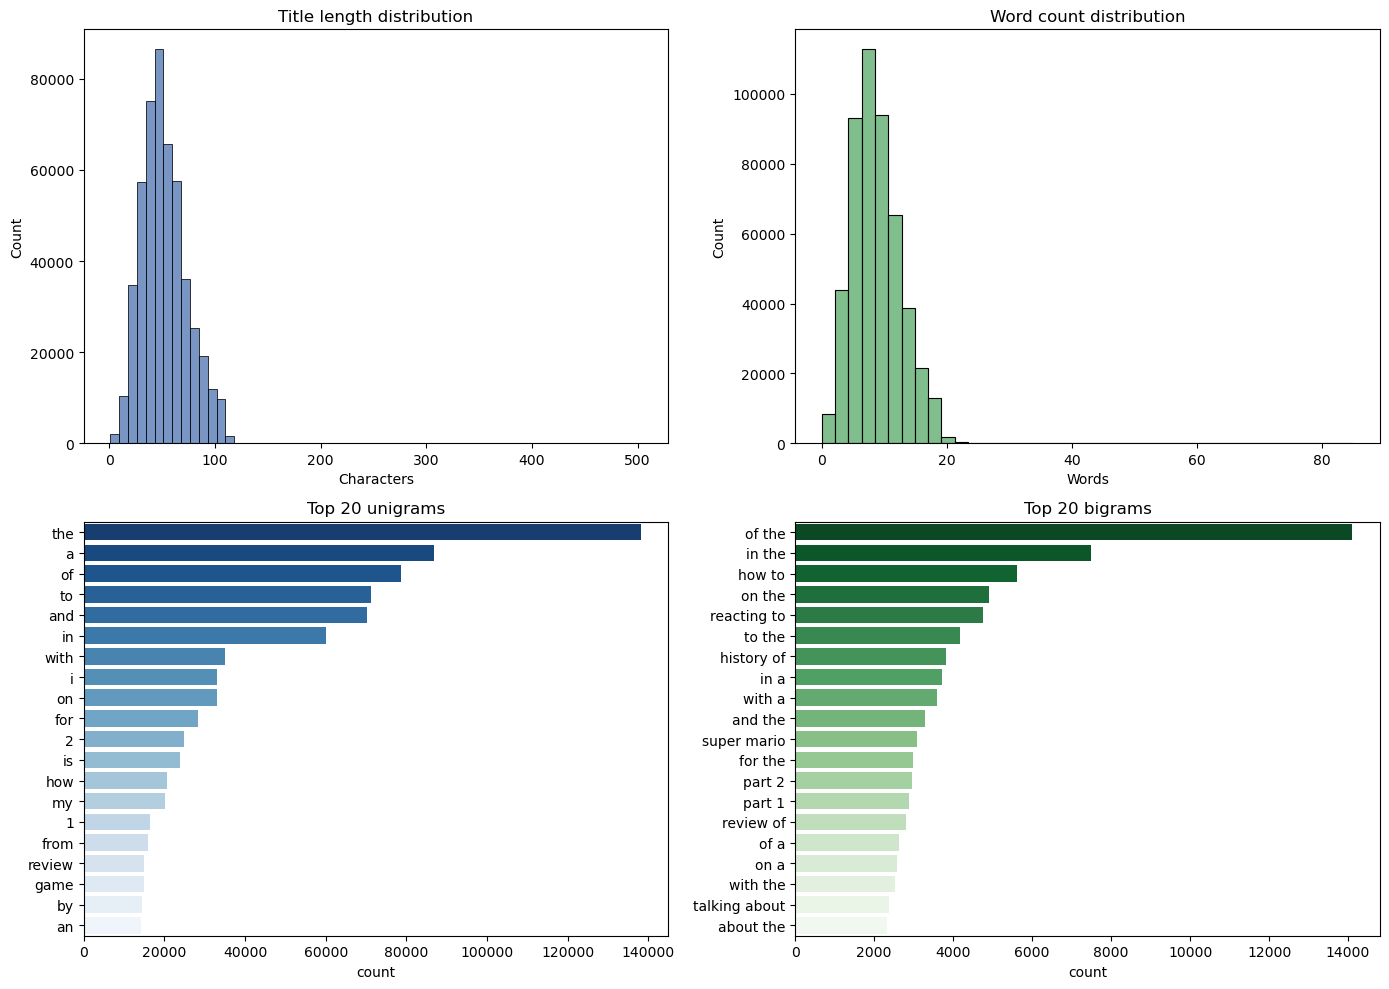

c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


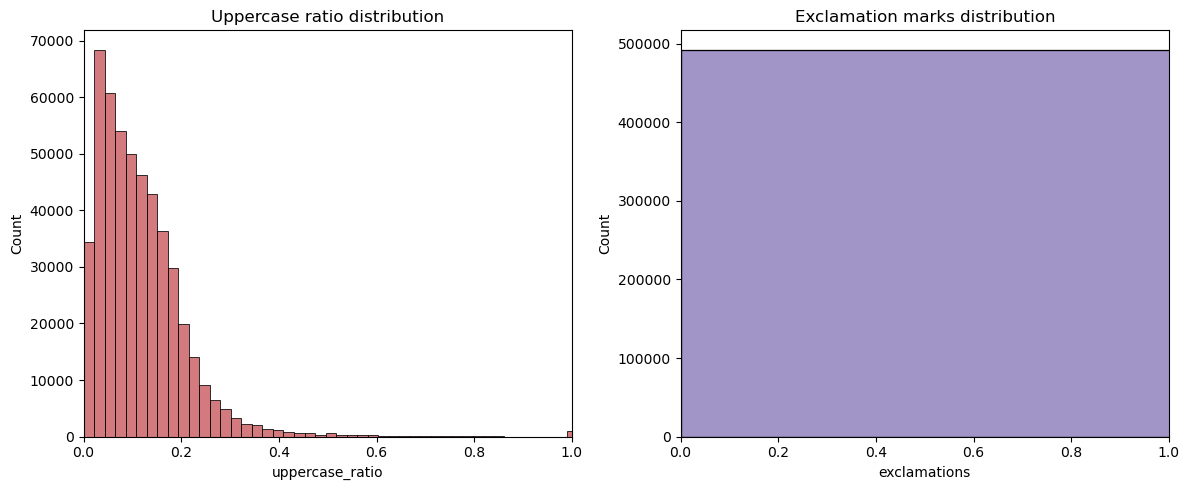

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top tokens
unigram_df = pd.DataFrame(unigram_counts.most_common(20), columns=['token', 'count'])
bigram_df = pd.DataFrame([
    (" ".join(k), v) for k, v in bigram_counts.most_common(20)
], columns=['bigram', 'count'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df_titles['title_length'], bins=60, kde=False, ax=axes[0, 0], color='#4c72b0')
axes[0, 0].set_title('Title length distribution')
axes[0, 0].set_xlabel('Characters')

sns.histplot(df_titles['word_count'], bins=40, kde=False, ax=axes[0, 1], color='#55a868')
axes[0, 1].set_title('Word count distribution')
axes[0, 1].set_xlabel('Words')

sns.barplot(data=unigram_df, y='token', x='count', ax=axes[1, 0], palette='Blues_r')
axes[1, 0].set_title('Top 20 unigrams')
axes[1, 0].set_ylabel('')

sns.barplot(data=bigram_df, y='bigram', x='count', ax=axes[1, 1], palette='Greens_r')
axes[1, 1].set_title('Top 20 bigrams')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

# Stylistic signals: uppercase ratio, exclamations, questions
display_cols = ['uppercase_ratio', 'digit_ratio', 'exclamations', 'questions']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(feature_frame['uppercase_ratio'], bins=50, ax=axes[0], color='#c44e52')
axes[0].set_title('Uppercase ratio distribution')
axes[0].set_xlim(0, 1)

sns.histplot(feature_frame['exclamations'], bins=30, ax=axes[1], color='#8172b3')
axes[1].set_title('Exclamation marks distribution')
axes[1].set_xlim(0, feature_frame['exclamations'].quantile(0.99))

plt.tight_layout()
plt.show()

### More title visuals (density & signals)

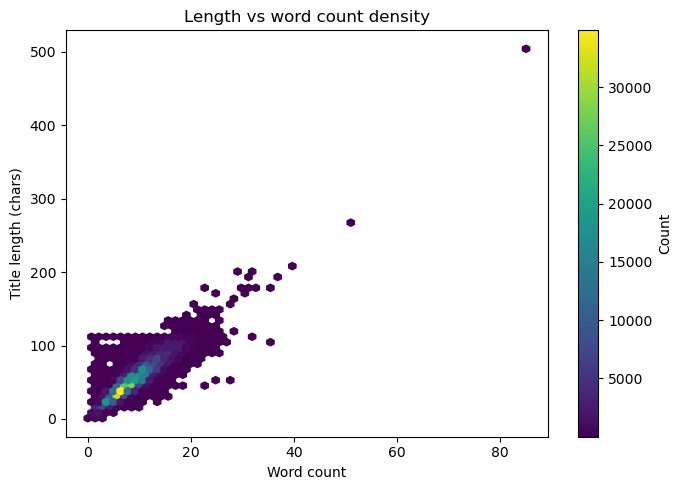

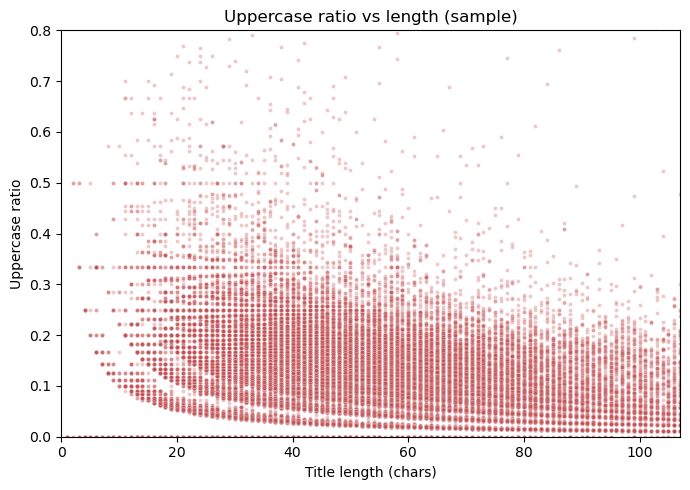

c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Sahar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


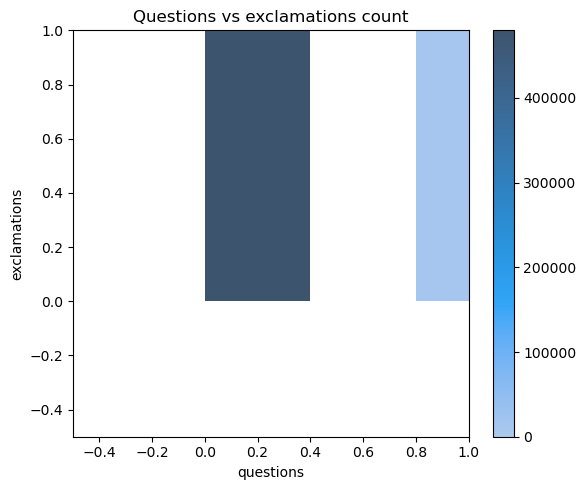

Top 5 exclamation-heavy titles:
            videoID                                              title
1727    -gE_oUERN5U  Ich kaufe minecraft füße für 50euro 150€ und E...
353913  h0xAqkzQ53k  Rx 9070/xt official performance in 30+ games l...
33835   W3Wx8kviBTA  Shocking!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
343429  aqtmsy83JIw  How to beat briansw-AAAAAAAAAAAAAAAACCCCCCCCCC...
284928  zbeqYTYt9_w  !!!!!!!!!!!!!59:20!!!!!!!!!!! Hivemind bits br...

Top 5 question-heavy titles:
            videoID                                              title
38439   eHjE9HFuoR8  I Fed a Crocodile to My Ostrich?!?!?!?!???!? [...
268135  0lvcwxRMX_o  Operation: Takedown - Season 1 - Song 15 - Dis...
215417  ZGE3LA7gdL8               Меня одного заебал этот чел?????????
208645  affUzkfNb4c  Explaining LowTierGod's actions and possible c...
384811  gjaPL6ZcxTw  (troll) FAQ 500k abonnés : TEC bloodborne ?? Â...


In [61]:
# 2D density: length vs word count (hexbin)
plt.figure(figsize=(7, 5))
plt.hexbin(df_titles['word_count'], df_titles['title_length'], gridsize=60, cmap='viridis', mincnt=1)
plt.xlabel('Word count')
plt.ylabel('Title length (chars)')
plt.title('Length vs word count density')
cb = plt.colorbar()
cb.set_label('Count')
plt.tight_layout()
plt.show()

# Uppercase ratio vs length (sample to keep rendering fast)
sample = feature_frame.sample(n=min(50000, len(feature_frame)), random_state=42)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=sample, x='title_length', y='uppercase_ratio', s=8, alpha=0.3, color='#c44e52')
plt.xlim(0, sample['title_length'].quantile(0.99))
plt.ylim(0, 0.8)
plt.title('Uppercase ratio vs length (sample)')
plt.xlabel('Title length (chars)')
plt.ylabel('Uppercase ratio')
plt.tight_layout()
plt.show()

# Questions vs exclamations joint distribution (counts)
plt.figure(figsize=(6, 5))
sns.histplot(feature_frame, x='questions', y='exclamations', bins=30, cbar=True)
plt.xlim(-0.5, feature_frame['questions'].quantile(0.99))
plt.ylim(-0.5, feature_frame['exclamations'].quantile(0.99))
plt.title('Questions vs exclamations count')
plt.tight_layout()
plt.show()

# Top exclamation and question titles (quick peek)
top_exc_titles = feature_frame['exclamations'].nlargest(5).index
print("Top 5 exclamation-heavy titles:")
print(df_titles.loc[top_exc_titles, ['videoID', 'title']])

top_q_titles = feature_frame['questions'].nlargest(5).index
print("\nTop 5 question-heavy titles:")
print(df_titles.loc[top_q_titles, ['videoID', 'title']])

## titleVotes.csv

In [54]:
import pandas as pd

df_title_votes = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\titleVotes.csv')

# drop the 'service' column if present
df_title_votes = df_title_votes.drop(columns=['service'], errors='ignore')

print("Shape:", df_title_votes.shape)
print("\nColumns:", df_title_votes.columns.tolist())
print("\nFirst few rows:")
print(df_title_votes.head())
print("\nData types:")
print(df_title_votes.dtypes)
print("\nMissing values:")
print(df_title_votes.isnull().sum())

Shape: (493235, 7)

Columns: ['UUID', 'votes', 'locked', 'shadowHidden', 'verification', 'downvotes', 'removed']

First few rows:
                                   UUID  votes  locked  shadowHidden  \
0  6e72051b-48f0-42f6-8497-41ed41fc0c7d      0       0             0   
1  c10af58e-8cfb-410f-a244-6288fc1b0aa8      0       1             0   
2  79e7b51d-c6ad-4c0e-8fcd-6a516b8d530f      0       0             0   
3  2c4e1c9f-f1f6-45a8-be69-35545e7e1ad4      0       0             0   
4  84625823-1880-4737-860e-2d315ee79745      0       0             0   

   verification  downvotes  removed  
0             0          0        0  
1             0          0        0  
2            -1          0        0  
3             0          0        0  
4             0          0        0  

Data types:
UUID            object
votes            int64
locked           int64
shadowHidden     int64
verification     int64
downvotes        int64
removed          int64
dtype: object

Missing values:
UUID

In [55]:
# Vote patterns analysis
print("Vote statistics:")
print(df_title_votes['votes'].describe())
print("\nTop vote values:")
print(df_title_votes['votes'].value_counts().head())
print("\nLocked titles count:", df_title_votes['locked'].sum())
print("Verification status breakdown:")
print(df_title_votes['verification'].value_counts())

Vote statistics:
count    493235.000000
mean          0.048097
std           0.695224
min         -10.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          53.000000
Name: votes, dtype: float64

Top vote values:
votes
 0    393069
-1     49642
 1     37655
 2      8334
 3      2399
Name: count, dtype: int64

Locked titles count: 10955
Verification status breakdown:
verification
 0    384821
-1    108414
Name: count, dtype: int64


## videoInfo.csv

In [56]:
import pandas as pd

df_video_info = pd.read_csv(r'C:\Users\Sahar\Desktop\Clickbait_git\Clickbait-project\deArrow_data\videoInfo.csv')

print("Shape:", df_video_info.shape)
print("\nColumns:", df_video_info.columns.tolist())
print("\nFirst few rows:")
print(df_video_info.head())
print("\nData types:")
print(df_video_info.dtypes)
print("\nMissing values:")
print(df_video_info.isnull().sum())

Shape: (9846585, 4)

Columns: ['videoID', 'channelID', 'title', 'published']

First few rows:
       videoID                 channelID  \
0  QyTRvbb3gkk  UCr7tNSNf7_aEEh5P-F5mE4A   
1  qU1Yv58EXcc  UCo_IB5145EVNcf8hw1Kku7w   
2  yKkVHBh9DQk  UCXJkLU1wZVqZjjVe1MuRj-A   
3  7wCZSBOX7eM  UCg83RGdRpwfvoFEuE2zWKZA   
4  VVGjjaWWeRA  UCKBYXp4Xn2I2tL1UL4fpbhw   

                                               title     published  
0  Kronii Got Friendzoned by Chat but She End Up ...  1.634429e+09  
1  Game Theory: Minecraft's DARKEST Timeline! (He...  1.634429e+09  
2                      TRIPLE RECORD EN GLOBILLOS? 🎈  1.633565e+09  
3  Johnny vs. Nickelodeon All-Star Brawl (Sponsored)  1.633392e+09  
4           WOTB | NEW BIG HITTING JAGTIGER PREMIUM!  1.634429e+09  

Data types:
videoID       object
channelID     object
title         object
published    float64
dtype: object

Missing values:
videoID           1
channelID    797303
title        499508
published         0
dtype: int64


In [57]:
# Publication date and time analysis
df_video_info['published_date'] = pd.to_datetime(df_video_info['published'], unit='s', errors='coerce')
print("Publication date range:")
print("Earliest:", df_video_info['published_date'].min())
print("Latest:", df_video_info['published_date'].max())
print("\nPublished (Unix timestamp) statistics:")
print(df_video_info['published'].describe())

Publication date range:
Earliest: 1970-01-01 00:00:00
Latest: 2024-04-13 00:00:00

Published (Unix timestamp) statistics:
count    9.846585e+06
mean     5.038463e+08
std      7.465899e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.565222e+09
max      1.712966e+09
Name: published, dtype: float64


In [58]:
# Missing data detailed analysis
print("Missing values per column:")
missing_df = df_video_info.isnull().sum().sort_values(ascending=False)
print(missing_df)
print("\nMissing percentage per column:")
missing_pct = (missing_df / len(df_video_info) * 100).round(2)
print(missing_pct[missing_pct > 0])

Missing values per column:
channelID         797303
title             499508
videoID                1
published              0
published_date         0
dtype: int64

Missing percentage per column:
channelID    8.10
title        5.07
dtype: float64
